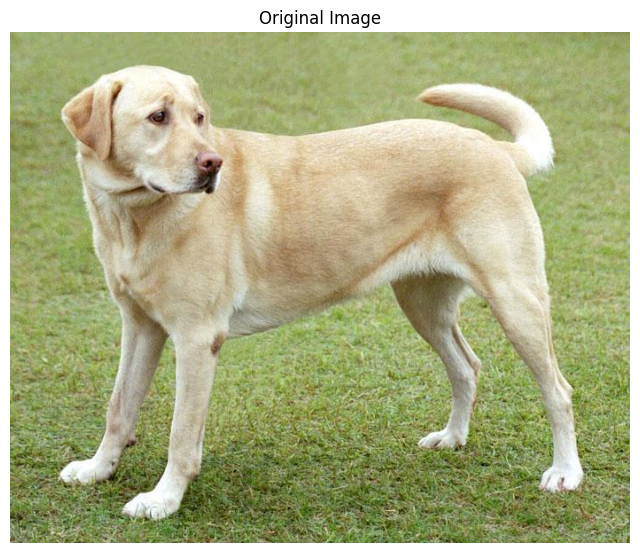

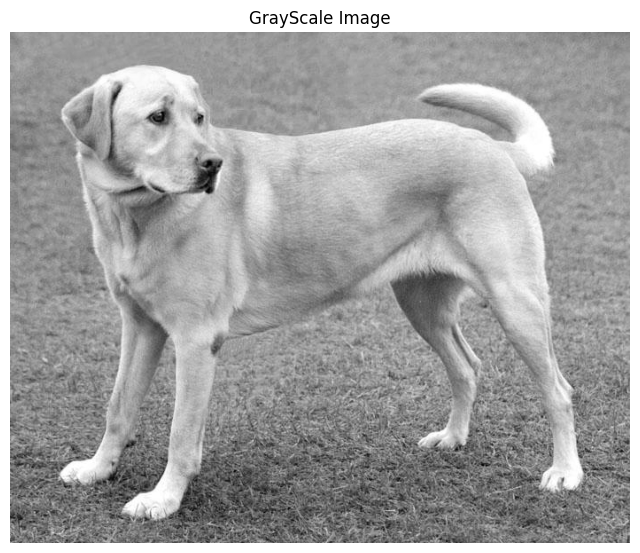

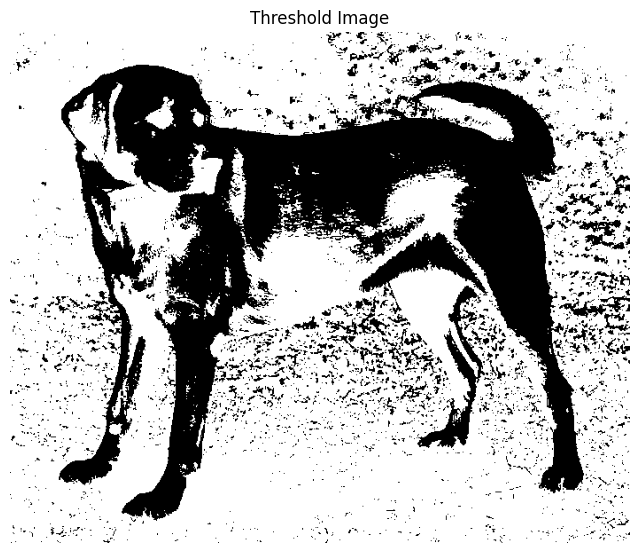

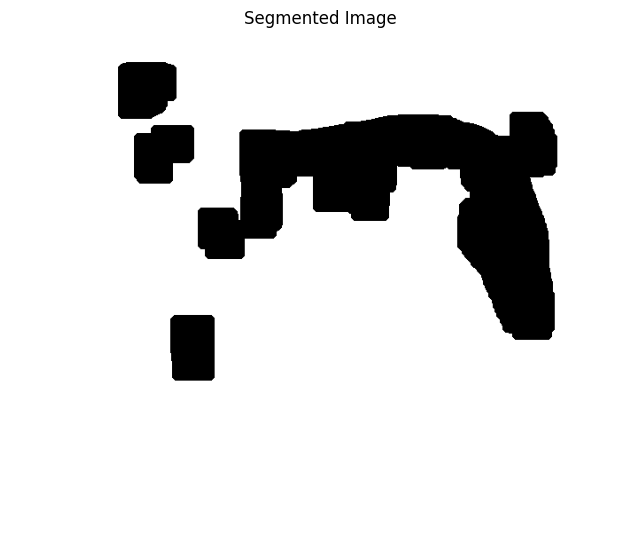

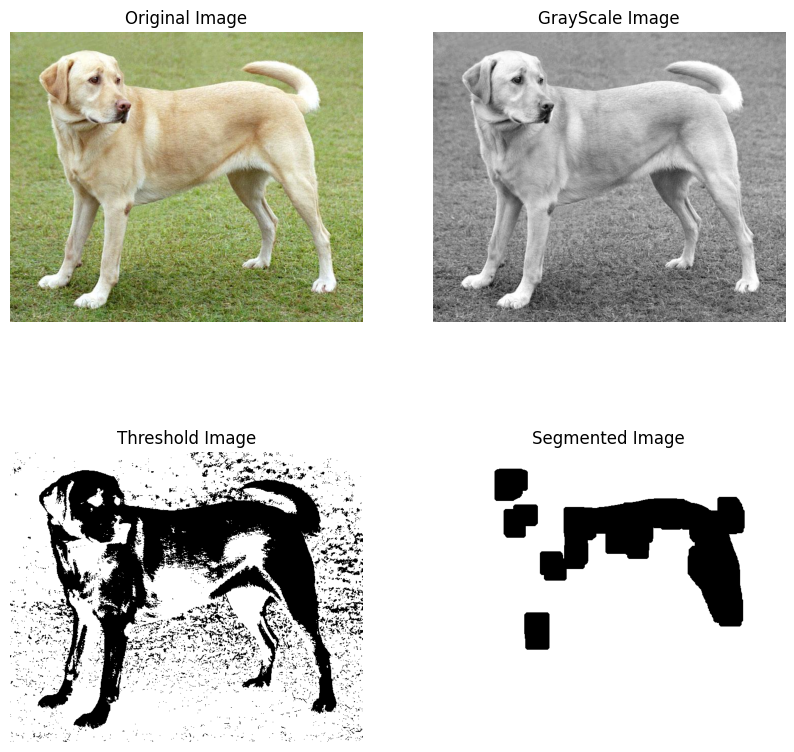

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/Dewmi Silva/Downloads/YellowLabradorLooking_new.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title("Original Image")
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 8))
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")
plt.show()

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure(figsize=(8, 8))
plt.imshow(thresh, cmap="gray")
plt.axis('off')
plt.title("Threshold Image")
plt.show()

kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=15)
bg = cv2.dilate(closing, kernel, iterations=1)
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02 * dist_transform.max(), 255, 0)

plt.figure(figsize=(8, 8))
plt.imshow(fg, cmap="gray")
plt.axis('off')
plt.title("Segmented Image")
plt.show()

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.axis('off')
plt.title("Original Image")
plt.imshow(img, cmap="gray")

plt.subplot(2, 2, 2)
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")

plt.subplot(2, 2, 3)
plt.imshow(thresh, cmap="gray")
plt.axis('off')
plt.title("Threshold Image")

plt.subplot(2, 2, 4)
plt.imshow(fg, cmap="gray")
plt.axis('off')
plt.title("Segmented Image")

plt.show()
